# 1)Defining Project objectives:

In [1]:
# "to predict the CLTV based on the user and policy data"

In [2]:
import pandas as pd
import numpy as np

# 2)data collection:

In [3]:
train = pd.read_csv("train_job.csv")
test = pd.read_csv("test_job.csv")

In [4]:
train

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736
...,...,...,...,...,...,...,...,...,...,...,...,...
89387,89388,Male,Rural,High School,More than 10L,0,6,0,More than 1,B,Platinum,95736
89388,89389,Male,Urban,Bachelor,5L-10L,1,0,3897,More than 1,A,Platinum,67596
89389,89390,Female,Urban,Bachelor,5L-10L,0,4,3363,More than 1,B,Platinum,114120
89390,89391,Female,Rural,High School,2L-5L,0,8,0,More than 1,B,Platinum,71772


In [5]:
test

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,89394,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,89395,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,89396,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,89397,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver
...,...,...,...,...,...,...,...,...,...,...,...
59590,148983,Male,Rural,Bachelor,5L-10L,1,6,0,1,A,Silver
59591,148984,Male,Urban,High School,5L-10L,0,6,0,1,C,Gold
59592,148985,Female,Urban,High School,2L-5L,1,4,3323,More than 1,B,Platinum
59593,148986,Male,Rural,Bachelor,5L-10L,0,1,2886,More than 1,A,Silver


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59595 entries, 0 to 59594
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              59595 non-null  int64 
 1   gender          59595 non-null  object
 2   area            59595 non-null  object
 3   qualification   59595 non-null  object
 4   income          59595 non-null  object
 5   marital_status  59595 non-null  int64 
 6   vintage         59595 non-null  int64 
 7   claim_amount    59595 non-null  int64 
 8   num_policies    59595 non-null  object
 9   policy          59595 non-null  object
 10  type_of_policy  59595 non-null  object
dtypes: int64(4), object(7)
memory usage: 5.0+ MB


In [8]:
train.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,89392.0,NaN,NaN,NaN,44696.5,25805.391969,1.0,22348.75,44696.5,67044.25,89392.0
gender,89392,2,Male,50497,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area,89392,2,Urban,62455,NaN,NaN,NaN,NaN,NaN,NaN,NaN
qualification,89392,3,High School,46247,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income,89392,4,5L-10L,52716,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital_status,89392.0,NaN,NaN,NaN,0.575488,0.494272,0.0,0.0,1.0,1.0,1.0
vintage,89392.0,NaN,NaN,NaN,4.595669,2.290446,0.0,3.0,5.0,6.0,8.0
claim_amount,89392.0,NaN,NaN,NaN,4351.502416,3262.359775,0.0,2406.0,4089.0,6094.0,31894.0
num_policies,89392,2,More than 1,60263,NaN,NaN,NaN,NaN,NaN,NaN,NaN
policy,89392,3,A,56644,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
test.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,59595.0,NaN,NaN,NaN,119190.0,17203.738983,89393.0,104291.5,119190.0,134088.5,148987.0
gender,59595,2,Male,33641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area,59595,2,Urban,41441,NaN,NaN,NaN,NaN,NaN,NaN,NaN
qualification,59595,3,High School,30835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income,59595,4,5L-10L,35088,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital_status,59595.0,NaN,NaN,NaN,0.576928,0.494051,0.0,0.0,1.0,1.0,1.0
vintage,59595.0,NaN,NaN,NaN,4.620304,2.282511,0.0,3.0,5.0,6.0,8.0
claim_amount,59595.0,NaN,NaN,NaN,4368.504321,3288.132408,0.0,2398.0,4106.0,6104.0,32534.0
num_policies,59595,2,More than 1,40308,NaN,NaN,NaN,NaN,NaN,NaN,NaN
policy,59595,3,A,37871,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 3)Exploratory data Analysis:


In [10]:
train.isna().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

In [11]:
test.isna().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
dtype: int64

In [12]:
train.duplicated().sum()

0

In [13]:
test.duplicated().sum()

0

In [14]:
train.nunique()

id                89392
gender                2
area                  2
qualification         3
income                4
marital_status        2
vintage               9
claim_amount      10889
num_policies          2
policy                3
type_of_policy        3
cltv              18796
dtype: int64

In [15]:
test.nunique()

id                59595
gender                2
area                  2
qualification         3
income                4
marital_status        2
vintage               9
claim_amount       9839
num_policies          2
policy                3
type_of_policy        3
dtype: int64

In [16]:
for i in train.columns:
  print(train[i].value_counts())
  print("\n")

1        1
59593    1
59601    1
59600    1
59599    1
        ..
29796    1
29795    1
29794    1
29793    1
89392    1
Name: id, Length: 89392, dtype: int64


Male      50497
Female    38895
Name: gender, dtype: int64


Urban    62455
Rural    26937
Name: area, dtype: int64


High School    46247
Bachelor       39399
Others          3746
Name: qualification, dtype: int64


5L-10L           52716
2L-5L            21158
More than 10L    13664
<=2L              1854
Name: income, dtype: int64


1    51444
0    37948
Name: marital_status, dtype: int64


6    17769
7    13095
5    12481
4    10471
2     9165
1     7671
8     7624
3     7085
0     4031
Name: vintage, dtype: int64


0        17671
4006        38
3912        33
3834        32
3833        32
         ...  
10979        1
12593        1
23063        1
21695        1
17143        1
Name: claim_amount, Length: 10889, dtype: int64


More than 1    60263
1              29129
Name: num_policies, dtype: int64


A    56644
B    24635

In [17]:
for i in test.columns:
  print(test[i].value_counts())
  print("\n")

89393     1
129127    1
129115    1
129116    1
129117    1
         ..
109262    1
109263    1
109264    1
109265    1
148987    1
Name: id, Length: 59595, dtype: int64


Male      33641
Female    25954
Name: gender, dtype: int64


Urban    41441
Rural    18154
Name: area, dtype: int64


High School    30835
Bachelor       26353
Others          2407
Name: qualification, dtype: int64


5L-10L           35088
2L-5L            14060
More than 10L     9163
<=2L              1284
Name: income, dtype: int64


1    34382
0    25213
Name: marital_status, dtype: int64


6    11901
7     8730
5     8337
4     7042
2     6018
8     5217
1     5109
3     4699
0     2542
Name: vintage, dtype: int64


0        11805
3846        26
4055        26
3919        26
3747        25
         ...  
8438         1
10595        1
18901        1
9097         1
14603        1
Name: claim_amount, Length: 9839, dtype: int64


More than 1    40308
1              19287
Name: num_policies, dtype: int64


A    37871


## 3.2)Data Visualization: 

In [18]:
#pip install pandas-profiling==3.2.0

In [19]:
#from pandas_profiling import ProfileReport

In [20]:
#profile = ProfileReport(train)

In [21]:
#profile = ProfileReport(train)

In [22]:
#pip install autoviz

In [23]:
#from autoviz.AutoViz_Class import AutoViz_Class

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

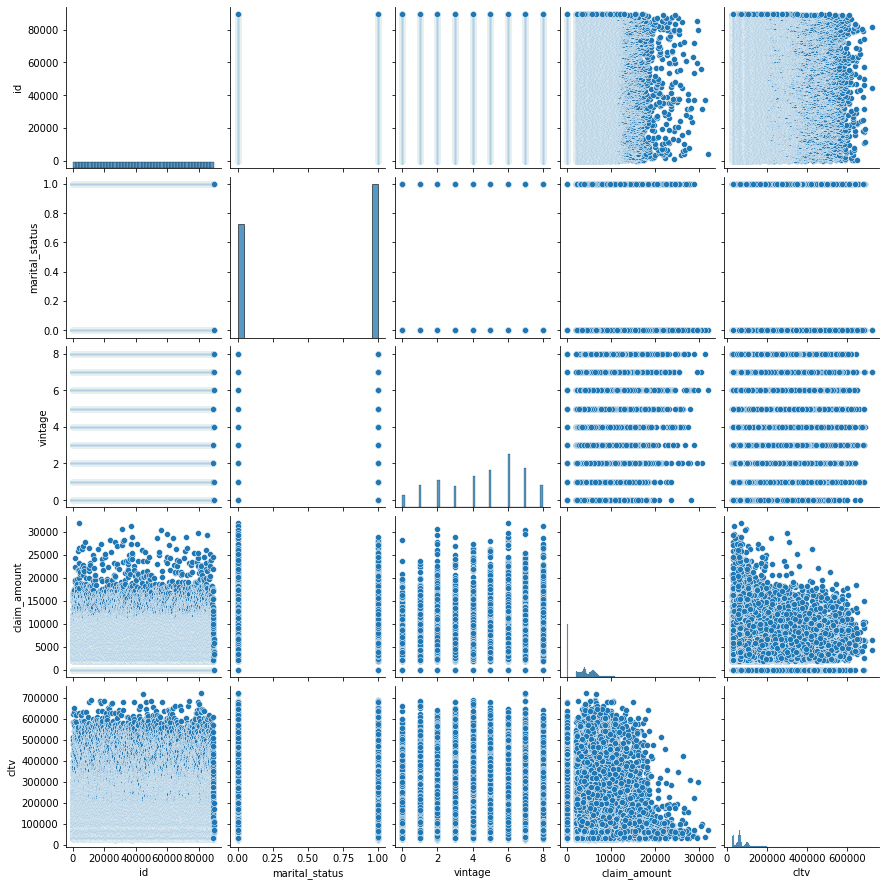

In [25]:
sns.pairplot(train)

In [26]:
corrmap= train.corr()
corrmap

,id,marital_status,vintage,claim_amount,cltv
id,1.000000,0.000171,-0.005824,0.003634,-0.004223
marital_status,0.000171,1.000000,-0.011686,-0.114924,-0.077744
vintage,-0.005824,-0.011686,1.000000,0.009579,0.020608
claim_amount,0.003634,-0.114924,0.009579,1.000000,0.180344
cltv,-0.004223,-0.077744,0.020608,0.180344,1.000000


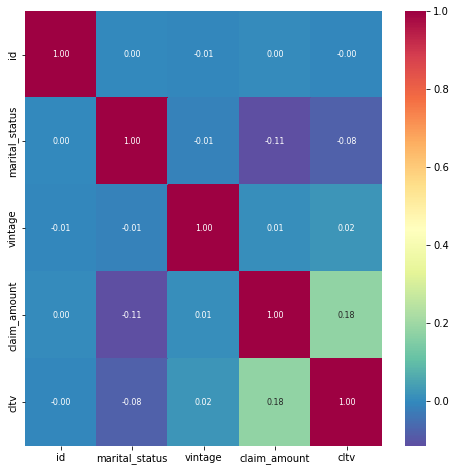

In [27]:
plt.subplots(figsize=(8,8))
hm = sns.heatmap(corrmap, 
                 cbar=True, 
                 annot=True, 
                 square=False, 
                 fmt='.2f', 
                 annot_kws={'size':8}, 
                 yticklabels=corrmap.columns, 
                 xticklabels=corrmap.columns, 
                 cmap="Spectral_r")
plt.show()

In [ ]:
train.skew(axis = 0, skipna = True)

<ipython-input-24-54444b7aa425>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.skew(axis = 0, skipna = True)


id                0.000000
marital_status   -0.305457
vintage          -0.378267
claim_amount      1.044233
cltv              2.753065
dtype: float64

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = train.iloc[:,:-1]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

print(vif_data)
# calculating VIF for each feature
#vif_data["VIF"] = [variance_inflation_factor(X.values, i)for i in range(len(X.columns))]
  
  #[variance_inflation_factor(train_1.values, i) for i in range(len(train_1.columns))]
print(vif_data)

           feature
0               id
1           gender
2             area
3    qualification
4           income
5   marital_status
6          vintage
7     claim_amount
8     num_policies
9           policy
10  type_of_policy
           feature
0               id
1           gender
2             area
3    qualification
4           income
5   marital_status
6          vintage
7     claim_amount
8     num_policies
9           policy
10  type_of_policy


In [ ]:
correlation=train.corr()
print(correlation["cltv"])

id               -0.004223
marital_status   -0.077744
vintage           0.020608
claim_amount      0.180344
cltv              1.000000
Name: cltv, dtype: float64


# 4)Data cleaning:

In [ ]:
train["source"]="Train"
test["source"]="Test"
data = pd.concat([train,test])
data = data.reset_index(drop=True)
data

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv,source
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308.0,Train
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400.0,Train
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212.0,Train
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920.0,Train
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736.0,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148982,148983,Male,Rural,Bachelor,5L-10L,1,6,0,1,A,Silver,NaN,Test
148983,148984,Male,Urban,High School,5L-10L,0,6,0,1,C,Gold,NaN,Test
148984,148985,Female,Urban,High School,2L-5L,1,4,3323,More than 1,B,Platinum,NaN,Test
148985,148986,Male,Rural,Bachelor,5L-10L,0,1,2886,More than 1,A,Silver,NaN,Test


In [ ]:
data["income"].value_counts()

5L-10L           87804
2L-5L            35218
More than 10L    22827
<=2L              3138
Name: income, dtype: int64

In [ ]:
data["income"].replace({"5L-10L":"10L","2L-5L":"5L","More than 10L":"15L","<=2L":"2L"},inplace=True)
data["income"].value_counts()

10L    87804
5L     35218
15L    22827
2L      3138
Name: income, dtype: int64

In [ ]:
data["num_policies"].replace({"More than 1":2,1:1},inplace=True)
data["num_policies"].value_counts()

2    100571
1     48416
Name: num_policies, dtype: int64

In [ ]:
data["gender"].replace({"Male":1,"Female":0},inplace=True)
data["gender"].value_counts()

1    84138
0    64849
Name: gender, dtype: int64

In [ ]:
data["area"].replace({"Urban":1,"Rural":0},inplace=True)
data["area"].value_counts()

1    103896
0     45091
Name: area, dtype: int64

In [ ]:
data["num_policies"]=data["num_policies"].astype("int64")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148987 entries, 0 to 148986
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              148987 non-null  int64  
 1   gender          148987 non-null  int64  
 2   area            148987 non-null  int64  
 3   qualification   148987 non-null  object 
 4   income          148987 non-null  object 
 5   marital_status  148987 non-null  int64  
 6   vintage         148987 non-null  int64  
 7   claim_amount    148987 non-null  int64  
 8   num_policies    148987 non-null  int64  
 9   policy          148987 non-null  object 
 10  type_of_policy  148987 non-null  object 
 11  cltv            89392 non-null   float64
 12  source          148987 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usage: 14.8+ MB


# 5)Data Transformation:

In [ ]:
data_cat = data.select_dtypes(exclude=np.number).drop("source",axis="columns")
data_cat

,qualification,income,policy,type_of_policy
0,Bachelor,10L,A,Platinum
1,High School,10L,A,Platinum
2,Bachelor,10L,A,Platinum
3,High School,10L,A,Platinum
4,High School,15L,A,Gold
...,...,...,...,...
148982,Bachelor,10L,A,Silver
148983,High School,10L,C,Gold
148984,High School,5L,B,Platinum
148985,Bachelor,10L,A,Silver


In [ ]:
data_cat= pd.get_dummies(data_cat)
data_cat

,qualification_Bachelor,qualification_High School,qualification_Others,income_10L,income_15L,income_2L,income_5L,policy_A,policy_B,policy_C,type_of_policy_Gold,type_of_policy_Platinum,type_of_policy_Silver
0,1,0,0,1,0,0,0,1,0,0,0,1,0
1,0,1,0,1,0,0,0,1,0,0,0,1,0
2,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,1,0,1,0,0,0,1,0,0,0,1,0
4,0,1,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148982,1,0,0,1,0,0,0,1,0,0,0,0,1
148983,0,1,0,1,0,0,0,0,0,1,1,0,0
148984,0,1,0,0,0,0,1,0,1,0,0,1,0
148985,1,0,0,1,0,0,0,1,0,0,0,0,1


In [ ]:
data_numbers = data.select_dtypes(include=np.number).drop(["id","cltv"],axis= "columns")
data_numbers

,gender,area,marital_status,vintage,claim_amount,num_policies
0,1,1,1,5,5790,2
1,1,0,0,8,5080,2
2,1,1,1,8,2599,2
3,0,0,0,7,0,2
4,1,1,1,6,3508,2
...,...,...,...,...,...,...
148982,1,0,1,6,0,1
148983,1,1,0,6,0,1
148984,0,1,1,4,3323,2
148985,1,0,0,1,2886,2


In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
RS = RobustScaler()
scaled = RS.fit_transform(data_numbers)

In [ ]:
data_num_scaled = pd.DataFrame(scaled, columns=data_numbers.columns)
data_num_scaled

,gender,area,marital_status,vintage,claim_amount,num_policies
0,0.0,0.0,0.0,0.000000,0.458604,0.0
1,0.0,-1.0,-1.0,1.000000,0.266504,0.0
2,0.0,0.0,0.0,1.000000,-0.404762,0.0
3,-1.0,-1.0,-1.0,0.666667,-1.107955,0.0
4,0.0,0.0,0.0,0.333333,-0.158820,0.0
...,...,...,...,...,...,...
148982,0.0,-1.0,0.0,0.333333,-1.107955,-1.0
148983,0.0,0.0,-1.0,0.333333,-1.107955,-1.0
148984,-1.0,0.0,0.0,-0.333333,-0.208874,0.0
148985,0.0,-1.0,-1.0,-1.333333,-0.327110,0.0


In [ ]:
data_category = data_cat.reset_index(drop = True)
data_num_scaled = data_num_scaled.reset_index(drop=True)

In [ ]:
data_preprocessed_scale = pd.concat([data_category, data_num_scaled, data[["id","cltv","source"]]], axis="columns")
data_preprocessed_scale

,qualification_Bachelor,qualification_High School,qualification_Others,income_10L,income_15L,income_2L,income_5L,policy_A,policy_B,policy_C,...,type_of_policy_Silver,gender,area,marital_status,vintage,claim_amount,num_policies,id,cltv,source
0,1,0,0,1,0,0,0,1,0,0,...,0,0.0,0.0,0.0,0.000000,0.458604,0.0,1,64308.0,Train
1,0,1,0,1,0,0,0,1,0,0,...,0,0.0,-1.0,-1.0,1.000000,0.266504,0.0,2,515400.0,Train
2,1,0,0,1,0,0,0,1,0,0,...,0,0.0,0.0,0.0,1.000000,-0.404762,0.0,3,64212.0,Train
3,0,1,0,1,0,0,0,1,0,0,...,0,-1.0,-1.0,-1.0,0.666667,-1.107955,0.0,4,97920.0,Train
4,0,1,0,0,1,0,0,1,0,0,...,0,0.0,0.0,0.0,0.333333,-0.158820,0.0,5,59736.0,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148982,1,0,0,1,0,0,0,1,0,0,...,1,0.0,-1.0,0.0,0.333333,-1.107955,-1.0,148983,NaN,Test
148983,0,1,0,1,0,0,0,0,0,1,...,0,0.0,0.0,-1.0,0.333333,-1.107955,-1.0,148984,NaN,Test
148984,0,1,0,0,0,0,1,0,1,0,...,0,-1.0,0.0,0.0,-0.333333,-0.208874,0.0,148985,NaN,Test
148985,1,0,0,1,0,0,0,1,0,0,...,1,0.0,-1.0,-1.0,-1.333333,-0.327110,0.0,148986,NaN,Test


In [ ]:
data_preprocessed_scale.skew(axis = 0, skipna = True)

<ipython-input-45-17e4bc5bfc68>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_preprocessed_scale.skew(axis = 0, skipna = True)


qualification_Bachelor       0.236327
qualification_High School   -0.069539
qualification_Others         4.610556
income_10L                  -0.363209
income_15L                   1.925565
income_2L                    6.670888
income_5L                    1.240971
policy_A                    -0.558077
policy_B                     1.003616
policy_C                     2.868183
type_of_policy_Gold          1.285302
type_of_policy_Platinum     -0.140236
type_of_policy_Silver        1.247770
gender                      -0.261136
area                        -0.859160
marital_status              -0.307841
vintage                     -0.380697
claim_amount                 1.055126
num_policies                -0.747428
id                           0.000000
cltv                         2.753065
dtype: float64

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
X = data_preprocessed_scale.iloc[:,:-3]
calc_vif(X)

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,qualification_Bachelor,inf
1,qualification_High School,inf
2,qualification_Others,inf
3,income_10L,inf
4,income_15L,inf
5,income_2L,inf
6,income_5L,inf
7,policy_A,inf
8,policy_B,inf
9,policy_C,inf


In [ ]:
correlation=data_preprocessed_scale.corr()
print(correlation["cltv"])

qualification_Bachelor       0.005511
qualification_High School    0.013329
qualification_Others        -0.046898
income_10L                  -0.038249
income_15L                  -0.039879
income_2L                    0.021668
income_5L                    0.070761
policy_A                     0.035181
policy_B                    -0.058261
policy_C                     0.031613
type_of_policy_Gold          0.008627
type_of_policy_Platinum      0.021295
type_of_policy_Silver       -0.033617
gender                      -0.001318
area                         0.133107
marital_status              -0.077744
vintage                      0.020608
claim_amount                 0.180344
num_policies                 0.360414
id                          -0.004223
cltv                         1.000000
Name: cltv, dtype: float64


In [ ]:
train_preprocess= data_preprocessed_scale[data_preprocessed_scale["source"]=="Train"].drop("source",axis="columns")
train_preprocess

,qualification_Bachelor,qualification_High School,qualification_Others,income_10L,income_15L,income_2L,income_5L,policy_A,policy_B,policy_C,...,type_of_policy_Platinum,type_of_policy_Silver,gender,area,marital_status,vintage,claim_amount,num_policies,id,cltv
0,1,0,0,1,0,0,0,1,0,0,...,1,0,0.0,0.0,0.0,0.000000,0.458604,0.0,1,64308.0
1,0,1,0,1,0,0,0,1,0,0,...,1,0,0.0,-1.0,-1.0,1.000000,0.266504,0.0,2,515400.0
2,1,0,0,1,0,0,0,1,0,0,...,1,0,0.0,0.0,0.0,1.000000,-0.404762,0.0,3,64212.0
3,0,1,0,1,0,0,0,1,0,0,...,1,0,-1.0,-1.0,-1.0,0.666667,-1.107955,0.0,4,97920.0
4,0,1,0,0,1,0,0,1,0,0,...,0,0,0.0,0.0,0.0,0.333333,-0.158820,0.0,5,59736.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89387,0,1,0,0,1,0,0,0,1,0,...,1,0,0.0,-1.0,-1.0,0.333333,-1.107955,0.0,89388,95736.0
89388,1,0,0,1,0,0,0,1,0,0,...,1,0,0.0,0.0,0.0,-1.666667,-0.053571,0.0,89389,67596.0
89389,1,0,0,1,0,0,0,0,1,0,...,1,0,-1.0,0.0,-1.0,-0.333333,-0.198052,0.0,89390,114120.0
89390,0,1,0,0,0,0,1,0,1,0,...,1,0,-1.0,-1.0,-1.0,1.000000,-1.107955,0.0,89391,71772.0


In [ ]:
test_preprocess = data_preprocessed_scale[data_preprocessed_scale["source"]=="Test"].drop(["source","cltv"],axis="columns")
test_preprocess

,qualification_Bachelor,qualification_High School,qualification_Others,income_10L,income_15L,income_2L,income_5L,policy_A,policy_B,policy_C,type_of_policy_Gold,type_of_policy_Platinum,type_of_policy_Silver,gender,area,marital_status,vintage,claim_amount,num_policies,id
89392,0,1,0,1,0,0,0,0,1,0,0,0,1,-1.0,-1.0,-1.0,0.333333,-0.530574,0.0,89393
89393,0,1,0,0,0,0,1,1,0,0,0,1,0,-1.0,0.0,-1.0,-0.333333,0.001894,0.0,89394
89394,0,1,0,1,0,0,0,0,1,0,1,0,0,0.0,-1.0,0.0,0.666667,-0.316558,0.0,89395
89395,1,0,0,0,1,0,0,0,1,0,0,0,1,-1.0,-1.0,0.0,-1.000000,-1.107955,0.0,89396
89396,0,1,0,0,0,0,1,0,1,0,0,0,1,-1.0,0.0,-1.0,0.000000,2.695887,0.0,89397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148982,1,0,0,1,0,0,0,1,0,0,0,0,1,0.0,-1.0,0.0,0.333333,-1.107955,-1.0,148983
148983,0,1,0,1,0,0,0,0,0,1,1,0,0,0.0,0.0,-1.0,0.333333,-1.107955,-1.0,148984
148984,0,1,0,0,0,0,1,0,1,0,0,1,0,-1.0,0.0,0.0,-0.333333,-0.208874,0.0,148985
148985,1,0,0,1,0,0,0,1,0,0,0,0,1,0.0,-1.0,-1.0,-1.333333,-0.327110,0.0,148986


In [ ]:
train = data_preprocessed_scale[data_preprocessed_scale["source"]=="Train"].drop(["source","qualification_Bachelor","qualification_High School","qualification_Others","income_10L","income_15L","income_2L","income_5L"],axis="columns")
train

,policy_A,policy_B,policy_C,type_of_policy_Gold,type_of_policy_Platinum,type_of_policy_Silver,gender,area,marital_status,vintage,claim_amount,num_policies,id,cltv
0,1,0,0,0,1,0,0.0,0.0,0.0,0.000000,0.458604,0.0,1,64308.0
1,1,0,0,0,1,0,0.0,-1.0,-1.0,1.000000,0.266504,0.0,2,515400.0
2,1,0,0,0,1,0,0.0,0.0,0.0,1.000000,-0.404762,0.0,3,64212.0
3,1,0,0,0,1,0,-1.0,-1.0,-1.0,0.666667,-1.107955,0.0,4,97920.0
4,1,0,0,1,0,0,0.0,0.0,0.0,0.333333,-0.158820,0.0,5,59736.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89387,0,1,0,0,1,0,0.0,-1.0,-1.0,0.333333,-1.107955,0.0,89388,95736.0
89388,1,0,0,0,1,0,0.0,0.0,0.0,-1.666667,-0.053571,0.0,89389,67596.0
89389,0,1,0,0,1,0,-1.0,0.0,-1.0,-0.333333,-0.198052,0.0,89390,114120.0
89390,0,1,0,0,1,0,-1.0,-1.0,-1.0,1.000000,-1.107955,0.0,89391,71772.0


In [ ]:
test = data_preprocessed_scale[data_preprocessed_scale["source"]=="Test"].drop(["source","cltv","qualification_Bachelor","qualification_High School","qualification_Others","income_10L","income_15L","income_2L","income_5L"],axis="columns")
test

,policy_A,policy_B,policy_C,type_of_policy_Gold,type_of_policy_Platinum,type_of_policy_Silver,gender,area,marital_status,vintage,claim_amount,num_policies,id
89392,0,1,0,0,0,1,-1.0,-1.0,-1.0,0.333333,-0.530574,0.0,89393
89393,1,0,0,0,1,0,-1.0,0.0,-1.0,-0.333333,0.001894,0.0,89394
89394,0,1,0,1,0,0,0.0,-1.0,0.0,0.666667,-0.316558,0.0,89395
89395,0,1,0,0,0,1,-1.0,-1.0,0.0,-1.000000,-1.107955,0.0,89396
89396,0,1,0,0,0,1,-1.0,0.0,-1.0,0.000000,2.695887,0.0,89397
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148982,1,0,0,0,0,1,0.0,-1.0,0.0,0.333333,-1.107955,-1.0,148983
148983,0,0,1,1,0,0,0.0,0.0,-1.0,0.333333,-1.107955,-1.0,148984
148984,0,1,0,0,1,0,-1.0,0.0,0.0,-0.333333,-0.208874,0.0,148985
148985,1,0,0,0,0,1,0.0,-1.0,-1.0,-1.333333,-0.327110,0.0,148986


In [ ]:
train_preprocess.to_csv("train_preprocess.csv",index=False)

In [ ]:
test_preprocess.to_csv("test_preprocess.csv",index=False)

In [ ]:
train.to_csv("train_ws.csv",index=False)

In [ ]:
test.to_csv("test_ws.csv",index=False)